# Basic Usage

## 1) Synthetic dataset

We import NumPy and helper utilities from ANFIS-Toolbox, then generate a simple noisy sine dataset for regression:
- Inputs `X` are evenly spaced in [-π, π].
- Targets `y` follow `sin(x)` with Gaussian noise.
This small problem is ideal to showcase ANFIS function approximation.

In [1]:
import numpy as np

np.random.seed(42)  # For reproducibility

n = 200
X = np.linspace(-np.pi, np.pi, n).reshape(-1, 1)
y = np.sin(X[:, 0]) + 0.2 * np.random.randn(n)
y = y.reshape(-1, 1)

## 2) Build, train, and evaluate ANFIS
Instantiate `ANFISRegressor` with Gaussian membership functions and the hybrid trainer:
- membership functions are inferred directly from the data;
- `fit` tunes both antecedent and consequent parameters;
- we call `quick_evaluate` on the fitted low-level model for a compact metric report.

In [20]:
from anfis_toolbox import ANFISRegressor, quick_evaluate

model = ANFISRegressor(epochs=10000)

model.fit(X, y)
history = model.training_history_ or []
metrics = quick_evaluate(model.model_, X, y)

if history:
    print(f"\nTracked {len(history)} epochs. Final training loss: {history[-1]:.6f}")
print(f"R² score: {metrics['r2']:.4f}")

ANFIS Model Evaluation Results
Mean Squared Error (MSE):     0.033221
Root Mean Squared Error:      0.182267
Mean Absolute Error (MAE):    0.145493
R-squared (R²):               0.9403
Mean Abs. Percentage Error:   61.78%
Maximum Error:                0.542719
Standard Deviation of Error:  0.182267

Tracked 10000 epochs. Final training loss: 0.033221
R² score: 0.9403


## 4) Visualize predictions
Compare the noisy samples against the ANFIS regression curve to gauge fit quality.

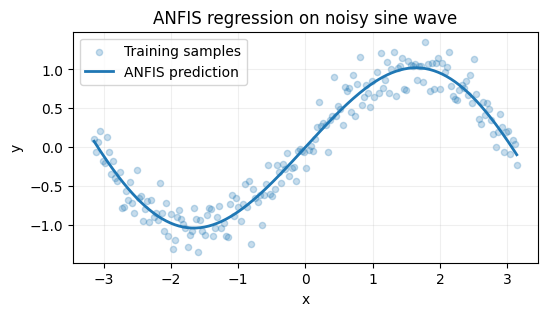

In [22]:
import matplotlib.pyplot as plt

x_flat = X[:, 0]
y_true = y[:, 0]
y_pred = model.predict(X)

plt.figure(figsize=(6, 3))
plt.scatter(x_flat, y_true, s=20, alpha=0.25, label="Training samples")
plt.plot(x_flat, y_pred, linewidth=2, label="ANFIS prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("ANFIS regression on noisy sine wave")
plt.grid(alpha=0.2)
plt.legend()
plt.show()